In [318]:
#dependencies

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

In [247]:
#reading data

df = pd.read_csv("C:/Users/danie/Documents/dev/Kaggle/Stroke Prediction/data/healthcare-dataset-stroke-data.csv")
train = pd.read_csv("C:/Users/danie/Documents/dev/Kaggle/Stroke Prediction/data/train.csv")

In [248]:
df1 = df.copy()
train1 = train.copy()
test1 = test.copy()

In [250]:
X_train = pd.concat([df1, train1])

In [251]:
X_train = X_train.drop('id',axis=1)
X_train = X_train.reset_index(drop=True)

In [252]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [254]:
X_train.stroke.value_counts()

stroke
0    19533
1      881
Name: count, dtype: int64

In [255]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20414 non-null  object 
 1   age                20414 non-null  float64
 2   hypertension       20414 non-null  int64  
 3   heart_disease      20414 non-null  int64  
 4   ever_married       20414 non-null  object 
 5   work_type          20414 non-null  object 
 6   Residence_type     20414 non-null  object 
 7   avg_glucose_level  20414 non-null  float64
 8   bmi                20213 non-null  float64
 9   smoking_status     20414 non-null  object 
 10  stroke             20414 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.7+ MB


In [256]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,20414.000000,20414.000000,20414.000000,20414.000000,20213.000000,20414.000000
mean,41.870510,0.061673,0.031008,93.322256,28.302280,0.043157
std,21.756482,0.240567,0.173344,32.476351,7.021765,0.203215
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,75.220000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,86.250000,27.700000,0.000000
75%,58.000000,0.000000,0.000000,99.730000,32.200000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

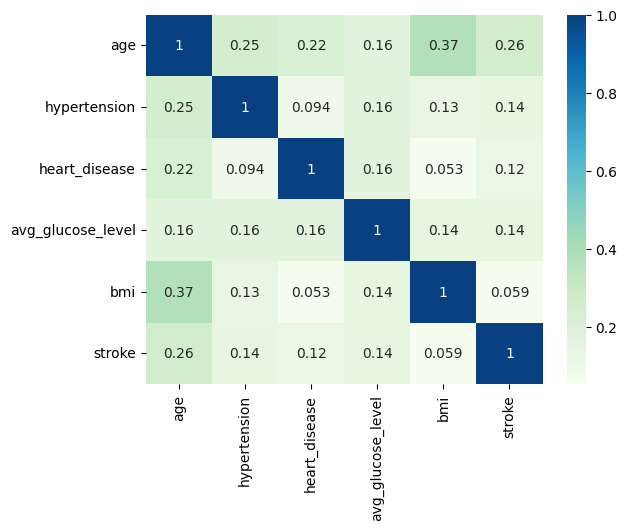

In [257]:
numeric_df = X_train.select_dtypes(include='number')

# Calculate correlation matrix
correlation = numeric_df.corr()
sns.heatmap(correlation, cmap="GnBu", annot= True)

In [258]:
numeric_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [259]:
numeric_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

C:\Users\danie\anaconda3\envs\pytorch_trial_0\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


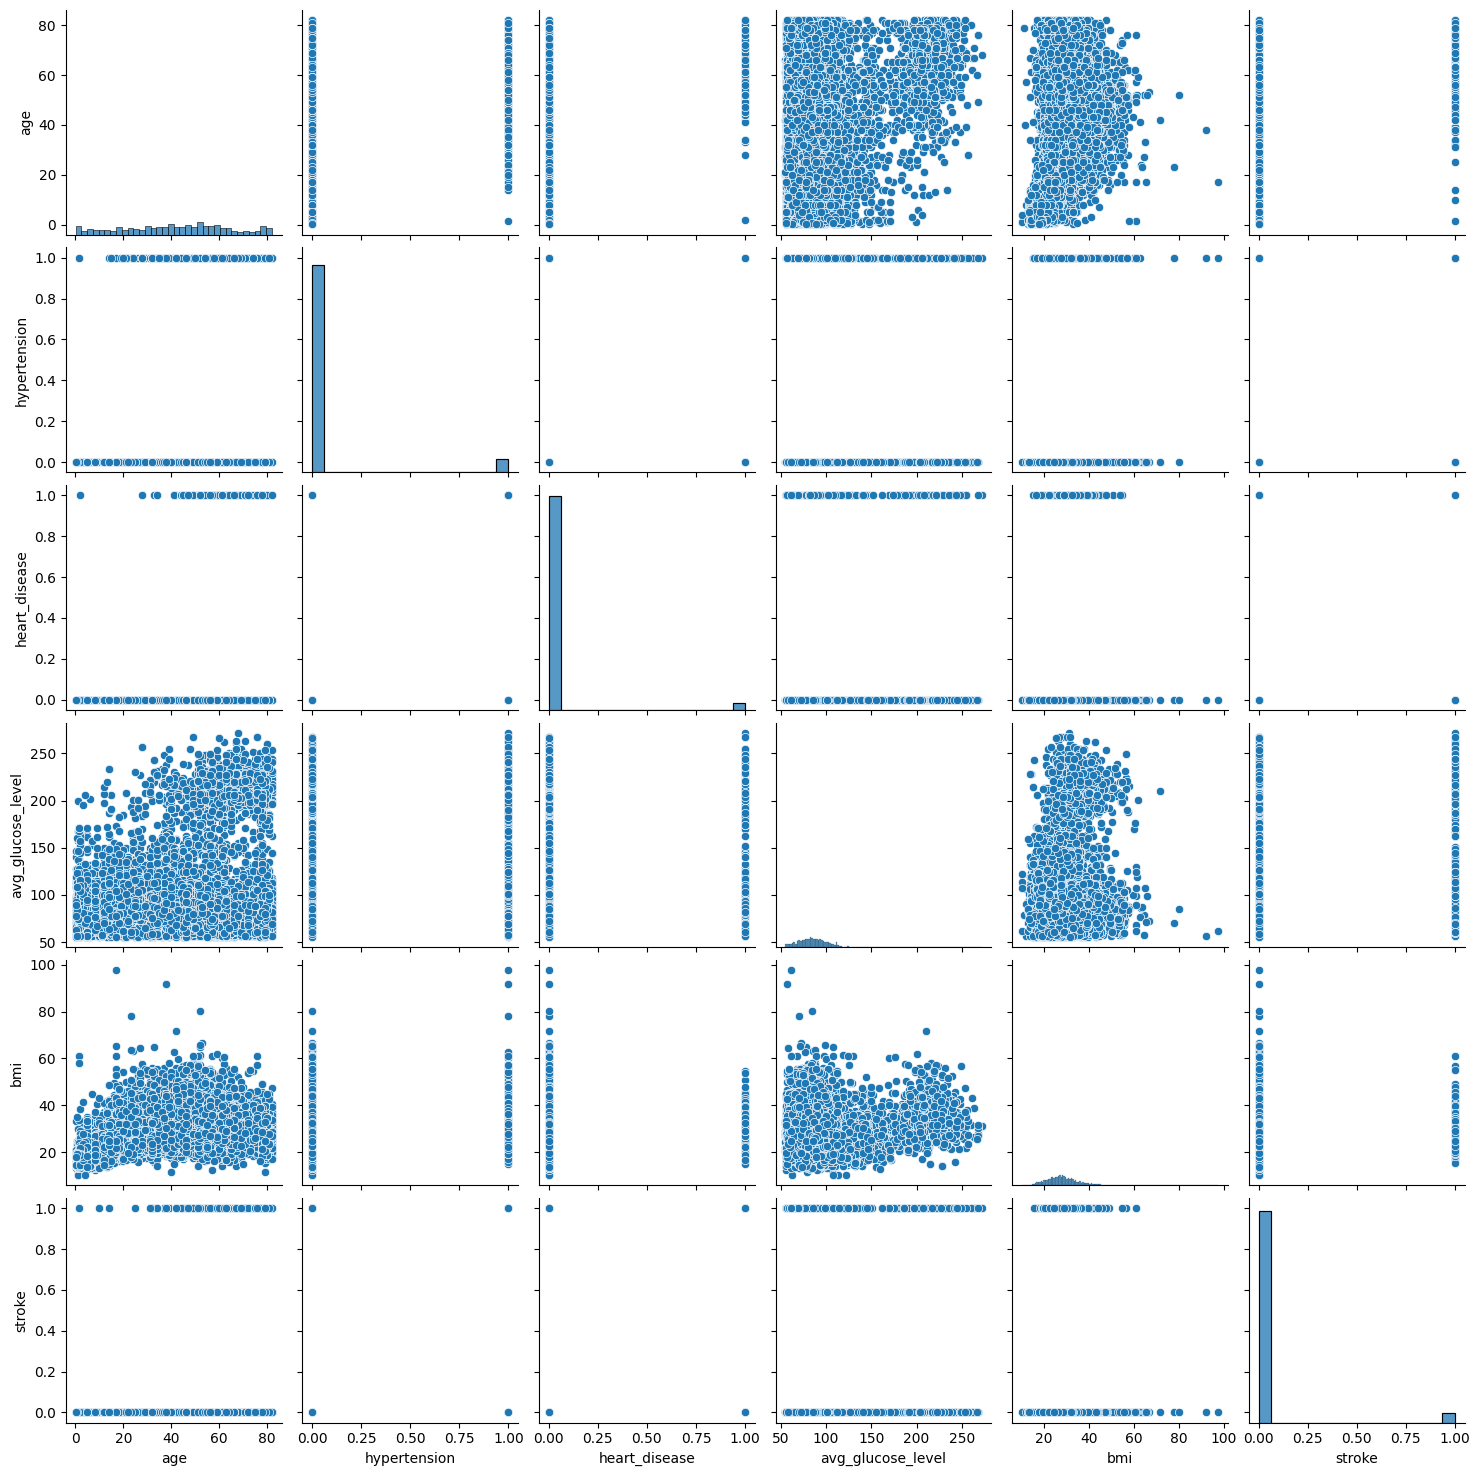

In [260]:
sns.pairplot(numeric_df, height=2.5)

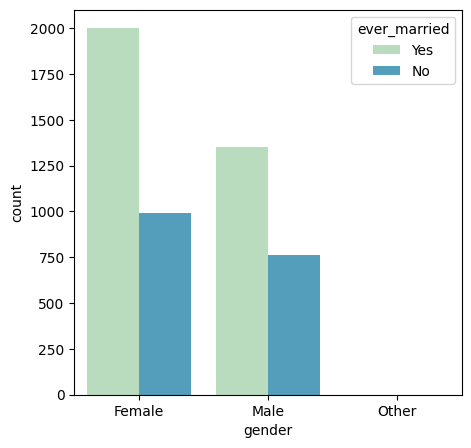

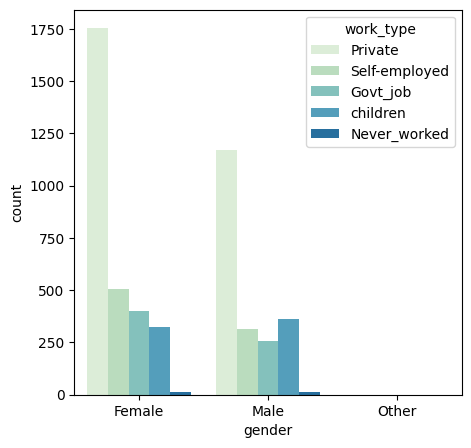

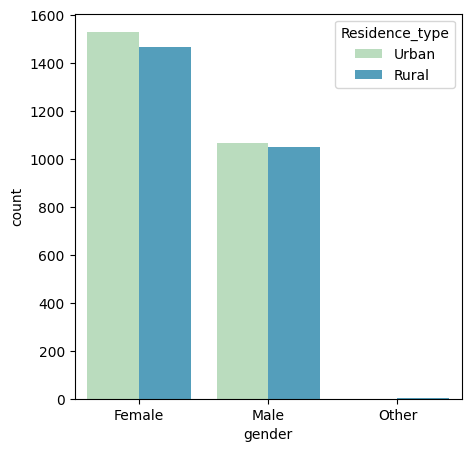

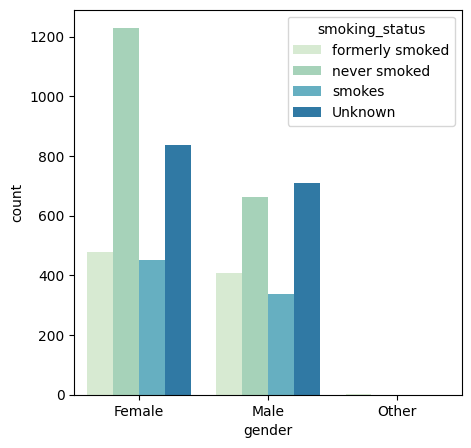

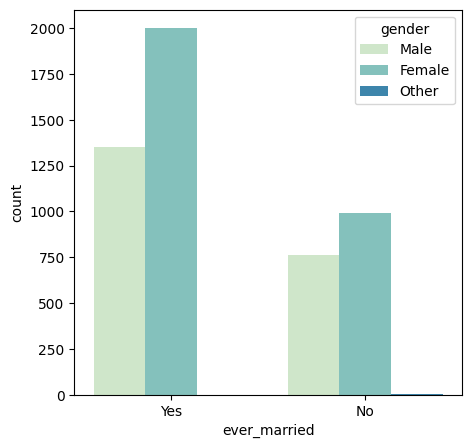

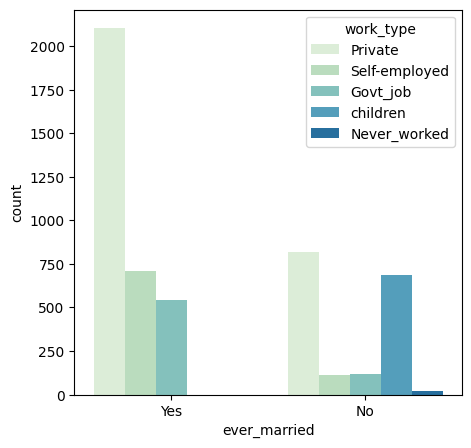

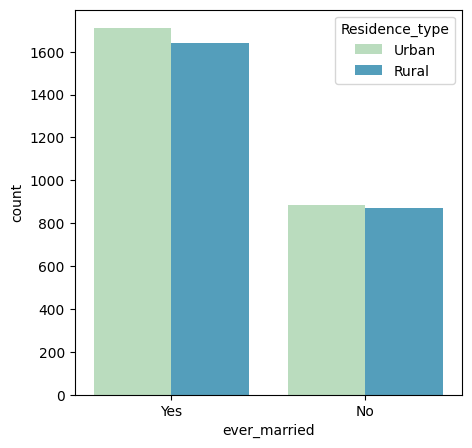

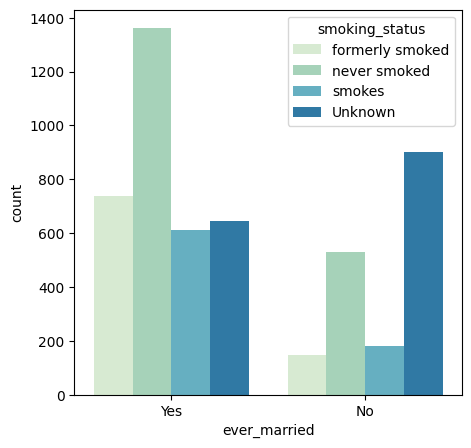

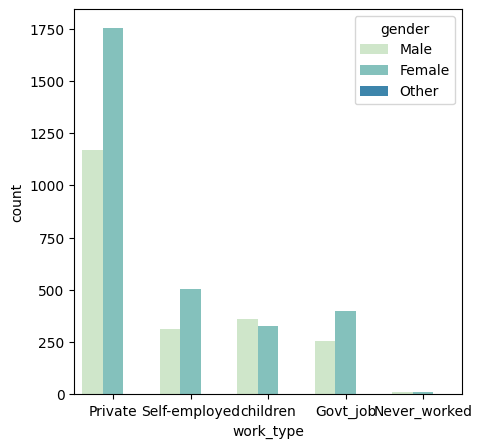

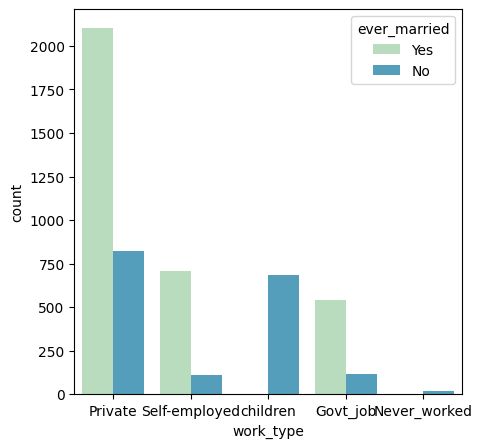

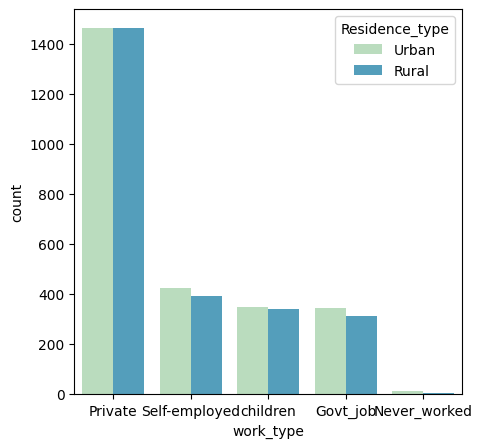

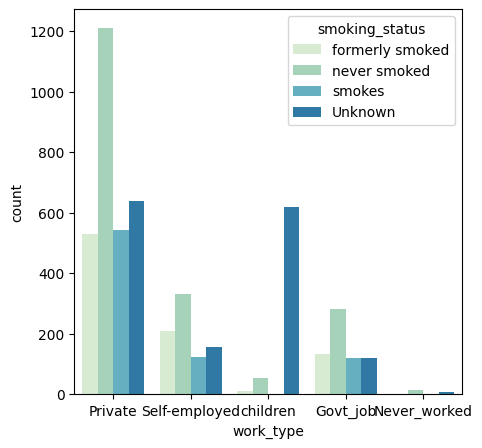

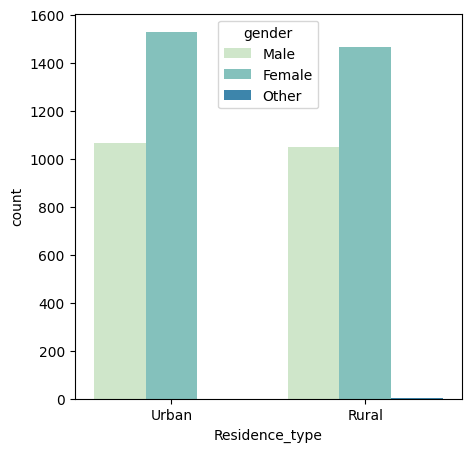

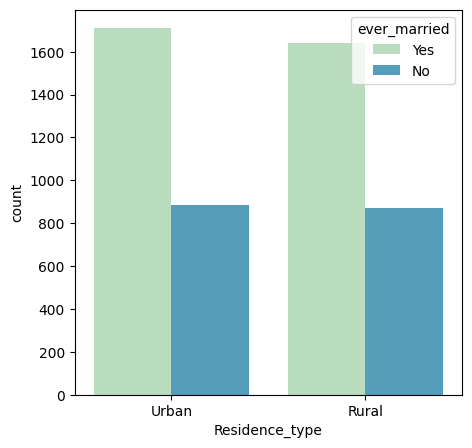

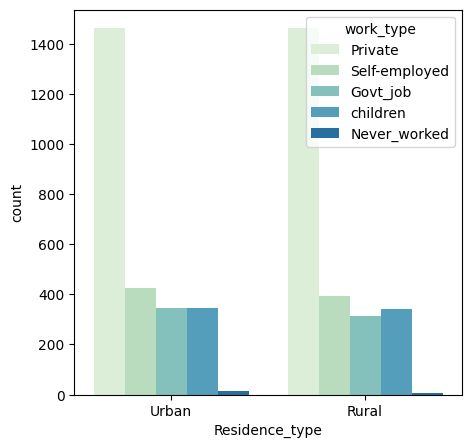

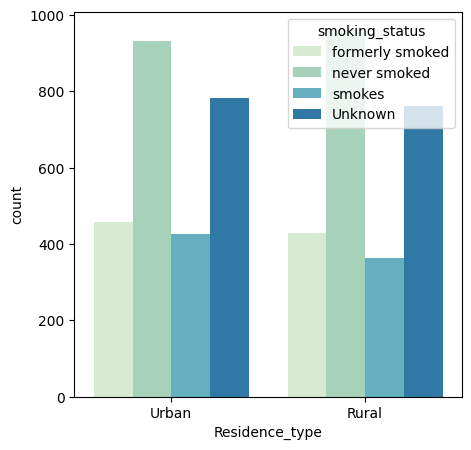

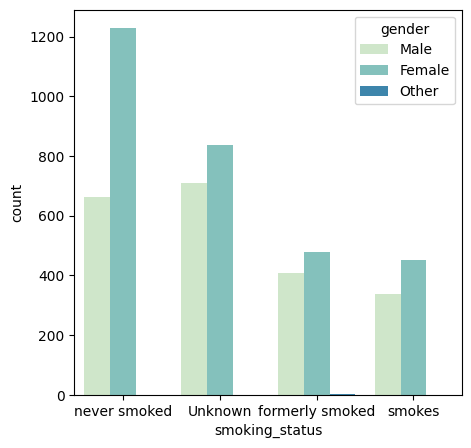

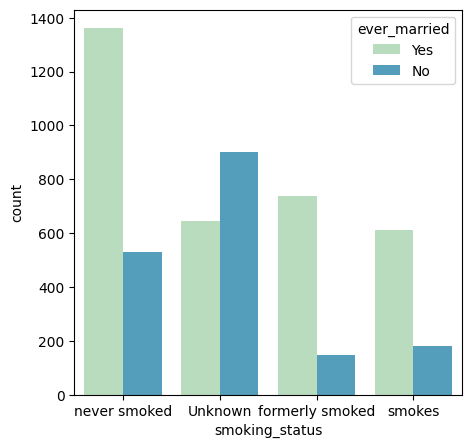

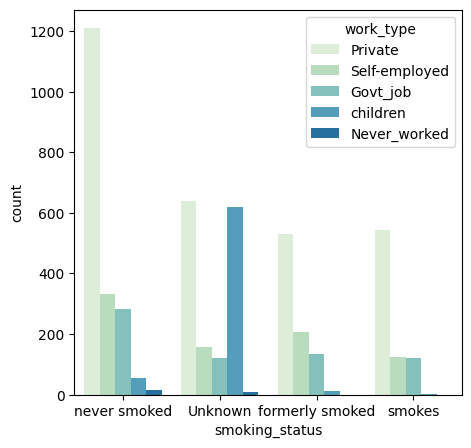

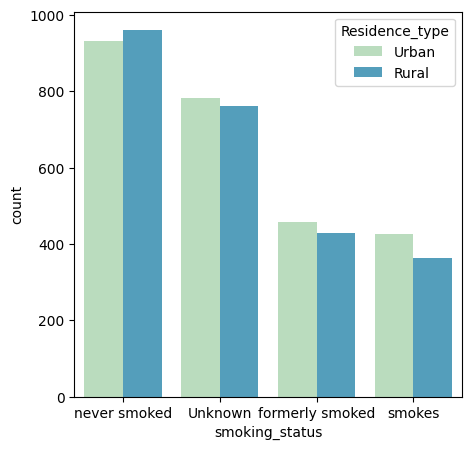

In [263]:
category_list = ['gender','ever_married','work_type','Residence_type','smoking_status']

for i in range(0, len(category_list)):
    primary_cat = category_list[i]
    for j in range( 0, len(category_list)):
        secondary_cat = category_list[j]
        if secondary_cat != primary_cat:
            plt.figure ( figsize = (5,5))
            chart = sns.countplot(
                data = df1,
                x = primary_cat,
                hue = secondary_cat,
                palette="GnBu",
                order = X_train[primary_cat].value_counts().iloc[:10].index
            )
            

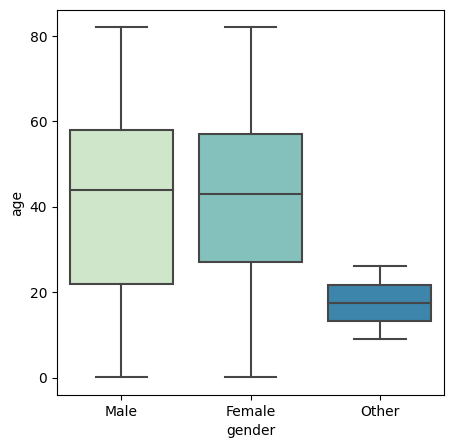

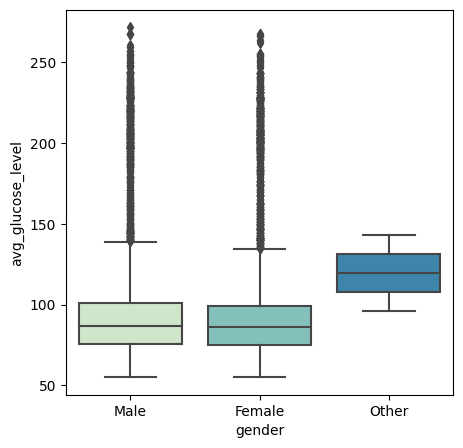

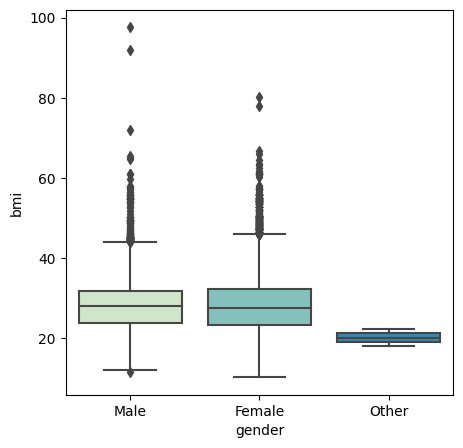

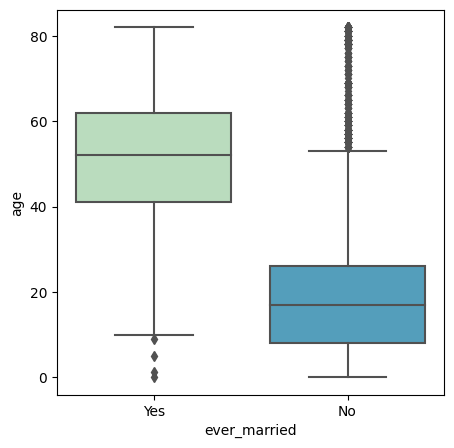

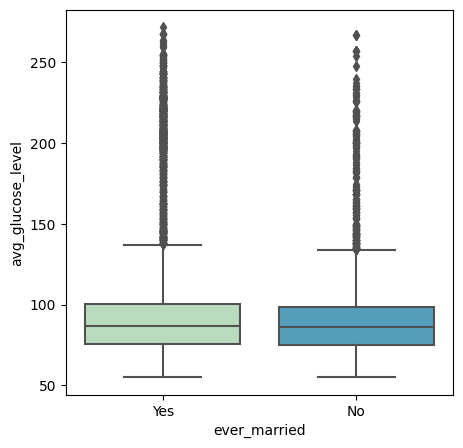

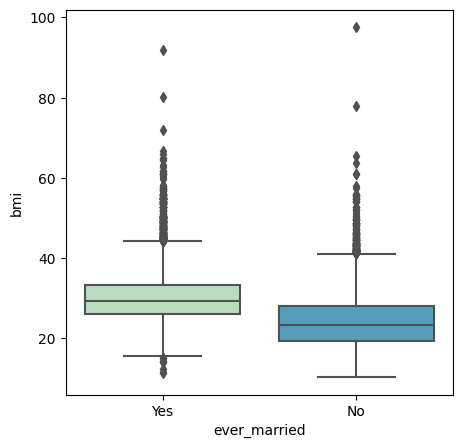

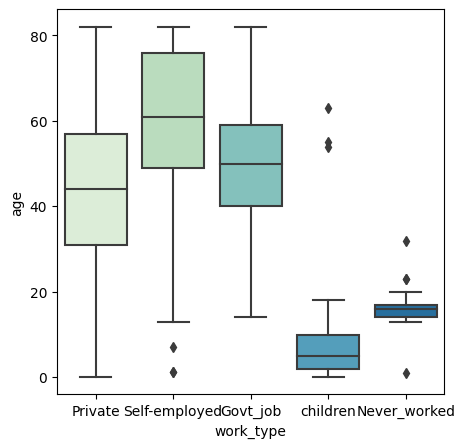

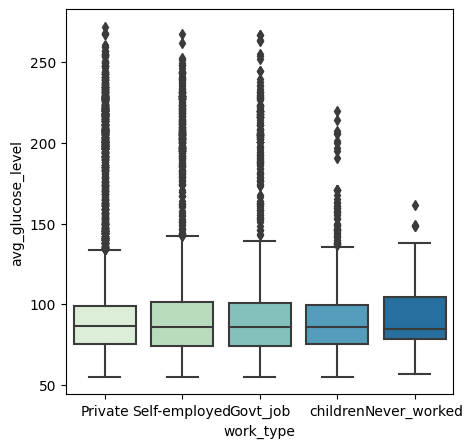

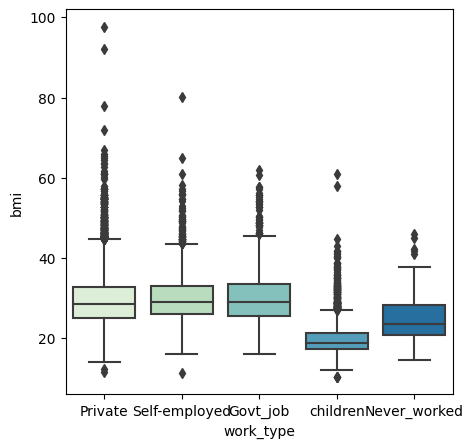

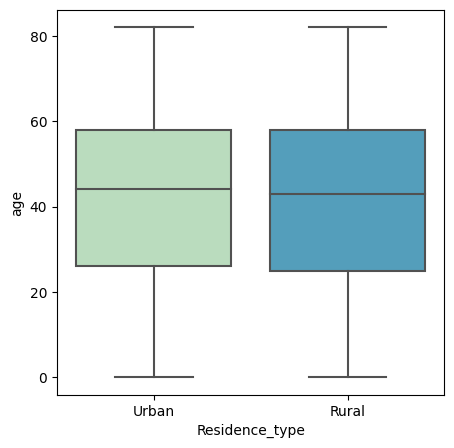

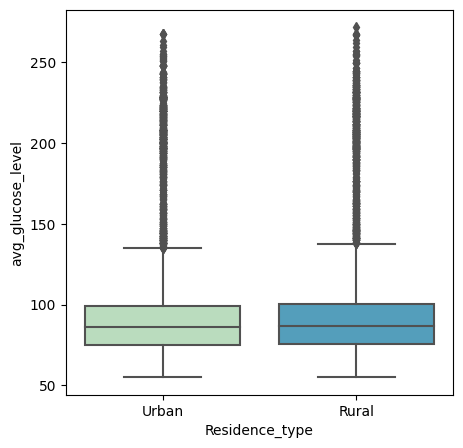

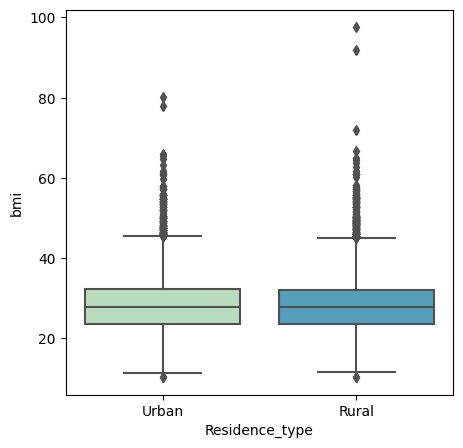

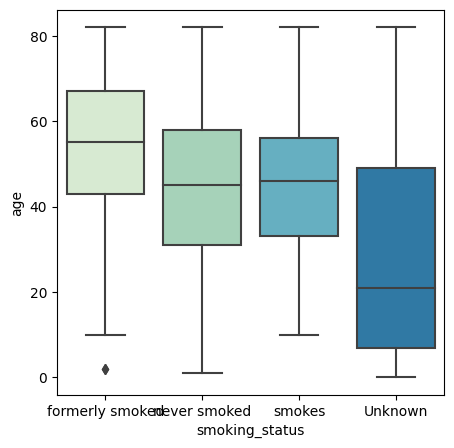

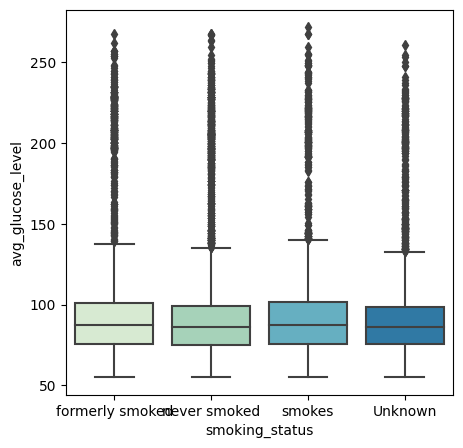

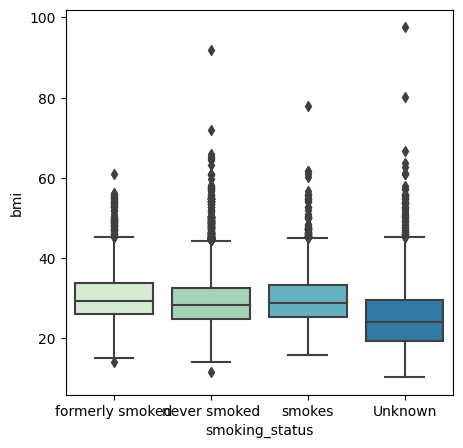

In [265]:
num_list = ['age','avg_glucose_level','bmi']

for i in range(0, len(category_list)):
    cat = category_list[i]
    for j in range(0, len(num_list)):
        num = num_list[j]
        plt.figure(figsize = (5,5))
        sns.boxplot(x=cat, y=num,data = X_train, palette="GnBu")
               

In [266]:
X = X_train.drop('stroke', axis=1)
y = X_train.stroke

In [270]:
df2 = X.copy().drop(category_list, axis=1)


encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = encoder.fit_transform(X[category_list])
encoded_data = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(category_list))

encoded_df = pd.concat([df2, encoded_data], axis=1)

In [271]:
encoded_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,NaN,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [272]:
encoded_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [273]:
cat_list = ['gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes','work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']  


numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, df2.columns),
        ('cat', categorical_transformer, cat_list)
    ])


In [337]:
pipelineTrain = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTETomek(random_state=42)),
    #('smote', ADASYN(random_state=42))
])

pipelineTest = ImbPipeline(steps=[
    ('preprocessor', preprocessor)
])

In [338]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

In [339]:
X_train_resampled, y_train_resampled = pipelineTrain.fit_resample(X_train, y_train)
#X_train_resampled = pipelineTrain.fit_transform(X_train)
X_test = pipelineTest.transform(X_test)

In [340]:
y_train_resampled.value_counts()

stroke
0    15409
1    15409
Name: count, dtype: int64

In [341]:
XGBoost = XGBClassifier()

scores = cross_val_score(XGBoost, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

In [342]:
print("Recall scores for each fold:", scores)

Recall scores for each fold: [0.80532122 0.98864374 0.98767034 0.9870172  0.98767034]


In [343]:
mean_recall = scores.mean()
print("Mean recall:", mean_accuracy)

Mean recall: 0.9376051779935276


In [344]:
XGBoost.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [345]:
y_pred = XGBoost.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9434239529757531


In [346]:
param_grid = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}


In [347]:
classifier = XGBClassifier()
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train_resampled, y_train_resampled)

print(f"Best params: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

y_pred = random_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Best params: {'colsample_bytree': 0.9140703845572055, 'learning_rate': 0.06990213464750791, 'max_depth': 9, 'n_estimators': 343, 'subsample': 0.836965827544817}
Best score: 0.9682015498701035
Accuracy: 0.9463629684055841


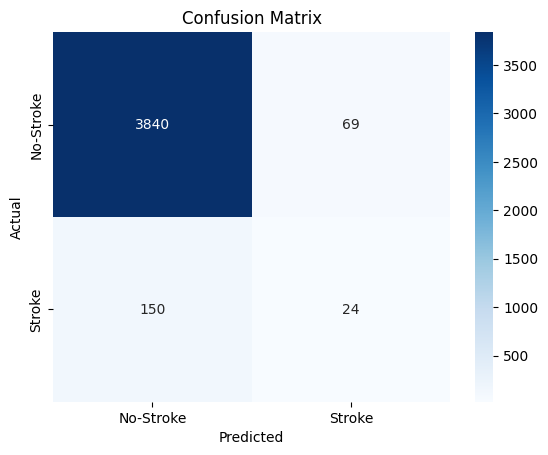

In [348]:
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['No-Stroke', 'Stroke']
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap= 'Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [349]:
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f"Precision:{precision}\n Recall: {recall}")

Precision:0.25806451612903225
 Recall: 0.13793103448275862


Optimizing for recall

In [350]:
random_search = RandomizedSearchCV(estimator=classifier,param_distributions=param_grid,n_iter=10, cv=5, scoring='recall',random_state=42)

random_search.fit(X_train_resampled, y_train_resampled), #y_train_resampled, y_train)

best_model= random_search.best_estimator_

y_pred = best_model.predict(X_test)

recall = recall_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", recall)

Best Parameters: {'colsample_bytree': 0.8404460046972835, 'learning_rate': 0.22242177333881366, 'max_depth': 8, 'n_estimators': 408, 'subsample': 0.9879639408647978}
Best Recall Score: 0.1724137931034483


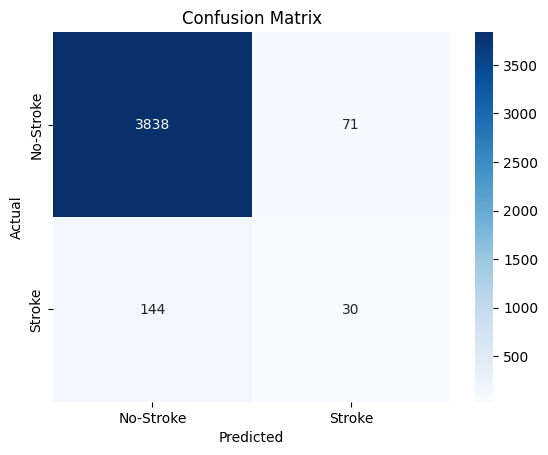

In [351]:
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['No-Stroke', 'Stroke']
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap= 'Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()